In [1]:
import scipy.io as sio
from scipy.io import readsav

import numpy as np
import math as m

import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import interp1d
import mpyfit

In [2]:
s = readsav('hd212657/hd212657ccfs.idl')


s_pd = pd.DataFrame(list(zip(s["jdb"], s["ccfs"],s["wls"], s["vrad"])), 
               columns =['jdb', 'ccfs', 'wls', 'vrad']) 
s_pd_clean = s_pd.drop([16,21,41])
s_pd_clean = s_pd_clean.reset_index(drop=True)
s_pd_clean

,jdb,ccfs,wls,vrad
0,57254.593124,"[14983578.0, 14979255.0, 14975776.0, 14972936....","[-37.5, -37.25, -37.0, -36.75, -36.5, -36.25, ...",-17.42422
1,57257.578995,"[11745628.0, 11744986.0, 11743543.0, 11741887....","[-37.5, -37.25, -37.0, -36.75, -36.5, -36.25, ...",-17.42245
2,57267.619795,"[11370518.0, 11370015.0, 11368927.0, 11367284....","[-37.5, -37.25, -37.0, -36.75, -36.5, -36.25, ...",-17.42343
3,57269.560355,"[9944056.0, 9940992.0, 9939069.0, 9937724.0, 9...","[-37.5, -37.25, -37.0, -36.75, -36.5, -36.25, ...",-17.42570
4,57270.543983,"[21964384.0, 21957742.0, 21952028.0, 21947840....","[-37.5, -37.25, -37.0, -36.75, -36.5, -36.25, ...",-17.42649
...,...,...,...,...
68,57671.506236,"[21062130.0, 21056196.0, 21053632.0, 21052610....","[-37.400001525878906, -37.150001525878906, -36...",-17.42302
69,57672.422952,"[19997164.0, 19992346.0, 19987076.0, 19981274....","[-37.400001525878906, -37.150001525878906, -36...",-17.41824
70,57672.508652,"[27738070.0, 27732616.0, 27726738.0, 27719684....","[-37.400001525878906, -37.150001525878906, -36...",-17.41655
71,57673.416804,"[13362156.0, 13361725.0, 13360224.0, 13358341....","[-37.400001525878906, -37.150001525878906, -36...",-17.41895


In [4]:
txt_file = pd.read_csv("hd212657/HD212657.RV.txt",delimiter="\t")

txt_file_clean = txt_file.drop([16,21,41])
txt_file_clean = txt_file_clean.reset_index(drop=True)
txt_file_clean

,BJD_UTC,vrad,svrad,fwhm,contrast,bis_span,noise,s_mw,sig_s,rhk,sig_rhk,sn_CaII,sn10,sn50,sn60,exptime,spectrograph,version
0,2.457255e+06,-17424.22,1.03,7615.54,30.860,59.04,0.96,0.00,0.0,0.0,0.0,0.0,71.6,150.9,143.9,900,HARPSN,HN3.7
1,2.457258e+06,-17422.45,1.15,7613.57,30.786,62.07,1.09,0.00,0.0,0.0,0.0,0.0,62.1,134.8,132.0,900,HARPSN,HN3.7
2,2.457268e+06,-17423.43,1.17,7621.53,30.692,60.57,1.12,0.00,0.0,0.0,0.0,0.0,60.1,135.8,133.0,900,HARPSN,HN3.7
3,2.457270e+06,-17425.70,1.25,7619.69,30.672,58.82,1.20,0.00,0.0,0.0,0.0,0.0,56.6,126.6,127.7,900,HARPSN,HN3.7
4,2.457271e+06,-17426.49,0.87,7618.71,30.670,63.70,0.80,0.00,0.0,0.0,0.0,0.0,86.9,190.9,191.7,900,HARPSN,HN3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2.457672e+06,-17423.02,0.88,7610.45,30.985,57.82,0.81,0.15,0.0,0.0,0.0,0.0,88.7,177.4,165.0,900,HARPSN,HN3.8
69,2.457672e+06,-17418.24,0.90,7606.60,30.912,60.34,0.83,0.15,0.0,0.0,0.0,0.0,86.2,176.0,170.4,900,HARPSN,HN3.8
70,2.457673e+06,-17416.55,0.78,7607.27,31.110,59.01,0.70,0.15,0.0,0.0,0.0,0.0,103.3,198.1,175.0,900,HARPSN,HN3.8
71,2.457673e+06,-17418.95,1.08,7615.96,30.955,58.15,1.02,0.15,0.0,0.0,0.0,0.0,70.5,140.5,134.8,900,HARPSN,HN3.8


Text(0, 0.5, 'RV (m/s)')

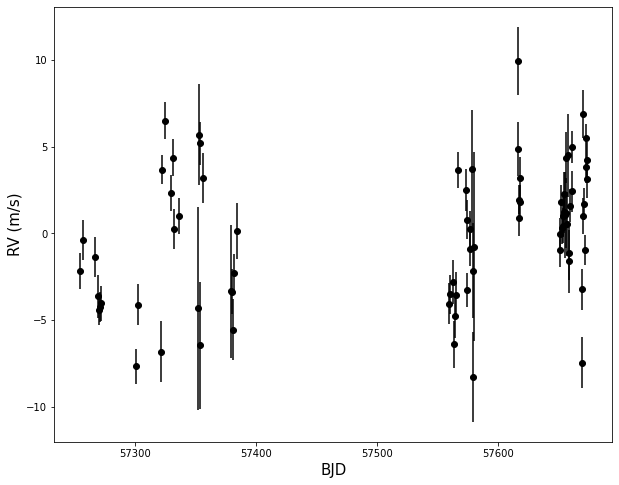

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))

x = txt_file["BJD_UTC"]-2400000
y = txt_file["vrad"]-np.mean(txt_file["vrad"])
yerr = txt_file["svrad"]

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
ax.errorbar(x, y, yerr = yerr, fmt = 'o', color='k')
ax.set_xlabel("BJD", size=15)
ax.set_ylabel("RV (m/s)",size=15)

16    5.86
17    2.91
18    3.67
19    1.24
20    1.42
21    3.82
22    1.29
23    1.74
24    1.11
Name: svrad, dtype: float64
35    0.96
36    0.96
37    1.06
38    3.39
39    2.59
40    2.76
41    5.43
42    1.98
43    1.54
44    1.00
Name: svrad, dtype: float64


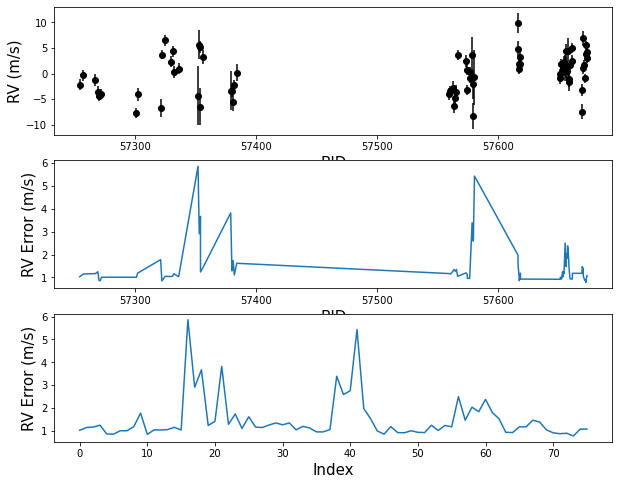

In [6]:
fig, ax = plt.subplots(3,1, figsize=(10, 8))

x = txt_file["BJD_UTC"]-2400000
y = txt_file["vrad"]-np.mean(txt_file["vrad"])
yerr = txt_file["svrad"]

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
ax[0].errorbar(x, y, yerr = yerr, fmt = 'o', color='k')
ax[0].set_xlabel("BJD", size=15)
ax[0].set_ylabel("RV (m/s)",size=15)

x_range = np.arange(0, len(txt_file["svrad"]))
ax[1].plot(txt_file["BJD_UTC"]-2400000, txt_file["svrad"])
ax[1].set_xlabel("BJD", size=15)
ax[1].set_ylabel("RV Error (m/s)",size=15)

ax[2].plot(x_range, txt_file["svrad"])
ax[2].set_xlabel("Index", size=15)
ax[2].set_ylabel("RV Error (m/s)",size=15)

#plt.plot(x_range[12:46], txt_file["svrad"][12:46])

print(txt_file["svrad"][16:25])
print(txt_file["svrad"][35:45])

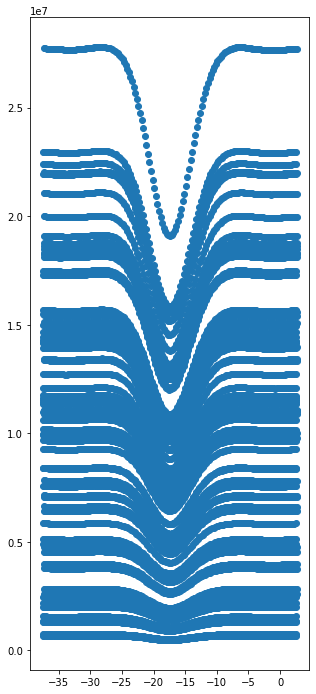

In [7]:
fig, ax = plt.subplots(figsize=(5, 12))
plt.scatter(s['wls'],s['ccfs'])

In [8]:
number_of_ccfs = len(s_pd_clean['wls'])
coeff_list= []
number_of_iterations_list = []
mu_og_list = []
mu_jup_list = []
mu_zero_list = []
BJD_list = []
shifted_CCF_list = []
v_rad_raw_list = []
rv_data_shifted_list = []
ref_shifted_CCF_data_list = []
rv_data_ref_shift_list = []
CCF_normalized_list = []
residual_CCF_list = []
fwhm_list = []
mu_ref_list = []


print(number_of_ccfs)

73


In [9]:
#fig, ax_raw = plt.subplots(1, 3, figsize=(18, 4))
#fig, ax_shift1 = plt.subplots(1, 3, figsize=(18, 4))
#fig, ax_shift2 = plt.subplots(1, 3, figsize=(18, 4))

for i in range(0, number_of_ccfs):
                #i = 0
                # extracts bjd from examples
                day_of_observation = s_pd_clean["jdb"][i]
                BJD_list.append(day_of_observation)

                # extracts the CCF data and rv from fits
                CCF_data = s_pd_clean['ccfs'][i]
                rv = s_pd_clean['vrad'][i] #- bsrv[i]
                fwhm = txt_file["fwhm"][i]
                contrast = txt_file["contrast"][i]
                bis_span = txt_file["bis_span"][i]
                noise = txt_file["noise"][i]
                s_mw = txt_file["s_mw"][i]
                sig_s = txt_file["sig_s"][i]
                sn10 = txt_file["sn10"][i]
                sn50 = txt_file["sn50"][i]
                sn60 = txt_file["sn60"][i]
                
                #jupiter_shift = bsrv[i]
                #v_rad_raw =  rvh[i] + bsrv[i]
                #v_rad_raw_list.append(v_rad_raw)
                #fwhm_DRS = fwhm[i]
                #cont_DRS = cont[i]
                #bis_DRS = bis[i]

                # Rescale the Delta(CCF) ~1
                #CCF_rescaled = (CCF_data - np.mean(CCF_data)) / np.std(CCF_data)

                # Finds the local minima using a Gaussian fit
                # Define the actual function where     A = p[0], mu = p[1], sigma = p[2], c = p[3]
                def gauss(x, p):
                    return -p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2)) + p[3]

                # A simple minimization function:
                def least(p, args):
                    x, y = args
                    return gauss(x, p) - y

                parinfo = [{'fixed': False, 'step': 1e-4*np.max(CCF_data)},
                           {'fixed': False, 'step': 1e-6},
                           {'fixed': False, 'step': 1e-4},
                           {'fixed': False, 'step': 1e-4*np.max(CCF_data)}]


                # no_shift fit
                rv_data = s_pd_clean["wls"][i]
                p_no_shifted = [0.42e7, -17.5, 3.5, 1.35e7]
                pfit_no_shift, results_no_shift = mpyfit.fit(least, p_no_shifted, (rv_data, CCF_data), parinfo)
                mu_og = pfit_no_shift[1]
                mu_og_list.append(mu_og)

                
                # Shift to reference spectrum x_axis (the first one)
                x_diff = s_pd_clean["wls"][0][0]-s_pd_clean["wls"][i][0]
                CCF_rescaled = CCF_data
                rv_data = s_pd_clean["wls"][i]
                rv_data_ref_shift = rv_data + x_diff # minus sign
                rv_data_ref_shift_list.append(rv_data_ref_shift)
                f_ref = interp1d(rv_data, CCF_data, kind='cubic', fill_value='extrapolate')
                ref_shifted_CCF_data = f_ref(rv_data_ref_shift) #rv_data_ref_shift
                ref_shifted_CCF_data_list.append(ref_shifted_CCF_data)
                
                # fit to reference frame shifted rvs
                p_ref_shifted = [0.42e7, -17.5, 3.5, 1.35e7]
                pfit_ref_shift, results_ref_shift = mpyfit.fit(least, p_no_shifted, (rv_data_ref_shift, ref_shifted_CCF_data), parinfo)
                mu_ref = pfit_ref_shift[1]
                mu_ref_list.append(mu_ref)

                # Shift to zero, after reference shift
                shift_to_zero = -rv + np.mean(s_pd_clean['vrad'])
                rv_data_shifted = rv_data_ref_shift + shift_to_zero
                rv_data_shifted_list.append(rv_data_shifted)

                f = interpolate.interp1d(rv_data_shifted, ref_shifted_CCF_data, kind='cubic', fill_value='extrapolate')
                shifted_CCF_data = f(rv_data_shifted)
                shifted_CCF_list.append(shifted_CCF_data)

                # fits the shifted data
                p_shifted = [0.42e7, -17.5+ shift_to_zero, 3.5, 1.35e7]
                pfit, results = mpyfit.fit(least, p_shifted, (rv_data_shifted, shifted_CCF_data), parinfo)
                m_zero = pfit[1]
                mu_zero_list.append(m_zero)#-0.1)
                
                # Normalizes the CCFs
                x_left = shifted_CCF_data[0:40]
                x_right = shifted_CCF_data[121:161]
                x_norm_range = list(x_left) + list(x_right)
                CCF_normalized = shifted_CCF_data*(1/np.mean(x_norm_range))
                CCF_normalized_list.append(CCF_normalized)
                
                # finds center of mass
                #center_of_mass = np.sum((1-CCF_data)*rv_data)/(np.sum(1-CCF_data))
                #print(center_of_mass)

                #creates columns in CCF.fits files
                col1 = fits.Column(name='RV data', format='E', array=rv_data_shifted)
                col2 = fits.Column(name='CCF data', format='E', array=CCF_normalized)
                #col3 = fits.Column(name='CCF data rescaled', format='E', array=CCF_rescaled)
                cols = fits.ColDefs([col1, col2]) #, col3])

                #tbhdu = fits.BinTableHDU.from_columns(cols)

                #hdu = fits.PrimaryHDU()
                hdu = fits.PrimaryHDU()
                hdulist = fits.HDUList([hdu])

                #hdu.data = fits.BinTableHDU.from_columns([col1, col2, col3])
                #hdu.data = fits.BinTableHDU.from_columns(cols)
                #hdu.data

                tbhdu = fits.BinTableHDU.from_columns(cols)
                hdu_new = fits.ImageHDU()
                hdr = fits.Header()
                primary_hdu = fits.PrimaryHDU(header=hdr)
                hdul = fits.HDUList([primary_hdu, hdu_new])

                hdul[0].header.set('label', s_pd_clean['vrad'][i], 'RV [km/s]')
                hdul[0].header.set('s_label', txt_file_clean['svrad'][i], 'RV [km/s]')
                #hdul[0].header.set('CENTMASS', center_of_mass, 'center of mass [km/s]')
                hdul[0].header.set('INSTRMNT', s_pd_clean['vrad'][i], 'HARPS-N')
                hdul[0].header.set("BJD", day_of_observation, 'Barycentric JD (from DRS)')
                hdul[0].header.set('MU_og', mu_og, 'km/s')
                hdul[0].header.set('mu_ref', mu_ref, 'km/s')
                hdul[0].header.set('MU_zero', m_zero, 'km/s')
                #hdul[0].header.set('N_iters', num_iters, 'iterations for fit')
                #hdul[0].header.set('Amp', pfit[0], 'coefficient for fit')
                #hdul[0].header.set('sigma', pfit[2], 'coefficient for fit')
                #hdul[0].header.set('offset', pfit[3], 'coefficient for fit')
                
                hdul[0].header.set('fwhm', fwhm, 'CCF FWHM from DRS')
                hdul[0].header.set('contrast', contrast, 'CCF contrast from DRS')
                hdul[0].header.set('bis', bis_span, 'CCF BIS Span from DRS')
                hdul[0].header.set('noise', noise, 'noise from DRS')
                hdul[0].header.set('s_mw', s_mw, 's_mw from DRS')
                hdul[0].header.set('sig_s', sig_s, 'sig_s from DRS')
                hdul[0].header.set('sn10', sn10, 'sn10 from DRS')
                hdul[0].header.set('sn50', sn50, 'sn50 from DRS')
                hdul[0].header.set('sn60', sn60, 'sn60 from DRS')
                

                hdul.append(tbhdu)
                
                #uncomment below if you want to write files
                #hdul.writeto('hd212657/shifted_fits_clean73_Dec18/ccf' + str(i)+'.fits')
                hdul.close()

In [10]:
len(BJD_list)

73

0.0010862128531714732


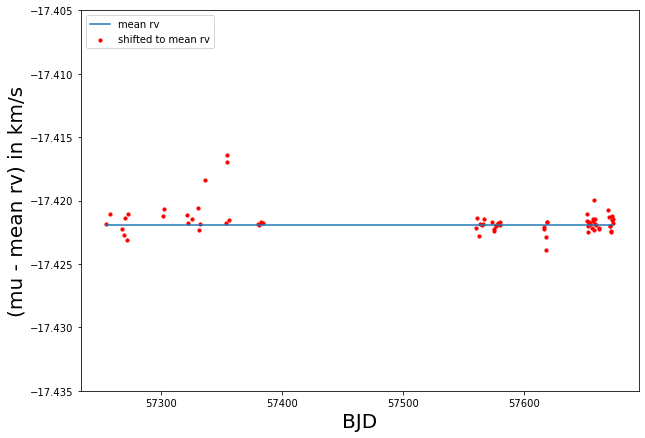

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot([np.min(BJD_list), np.max(BJD_list)], [np.mean(s_pd_clean['vrad']),np.mean(s_pd_clean['vrad'])], label="mean rv")
#ax.scatter(BJD_list, mu_og_list, label = "original", s=10)
#ax.scatter(BJD_list, mu_ref_list, label = "shifted to same reference wavelenghts", color="purple", s=10)
ax.scatter(BJD_list, mu_zero_list, label = "shifted to mean rv", color= "r", s=10)
ax.set_ylabel('(mu - mean rv) in km/s', size=20)
ax.set_xlabel('BJD', size=20)
ax.set_ylim(-17.435, -17.405)
ax.legend(loc="upper left")

print(np.std(mu_zero_list))

-0.004095890410958702


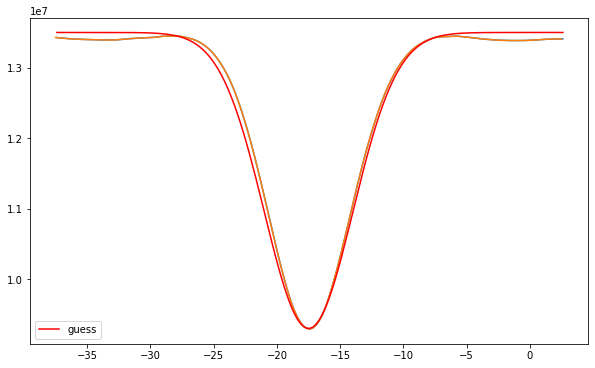

In [195]:
p = [0.42e7, -17.5, 3.5, 1.35e7]

print(shift_to_zero)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(rv_data, CCF_data)
ax.plot(rv_data_shifted, shifted_CCF_data)
#ax.plot([np.mean(s_pd_clean['vrad']), np.mean(s_pd_clean['vrad'])],
#        [np.min(shifted_CCF_data), np.max(shifted_CCF_data)], label ="mean_rv")
ax.plot(rv_data, -p[0] * np.exp(-(rv_data - p[1]) ** 2 / (2. * p[2] ** 2)) + p[3], color="r", label= "guess")
#ax.plot([rv+shift_to_zero, rv+shift_to_zero],
#        [np.min(shifted_CCF_data), np.max(shifted_CCF_data)], label ="shift_to_mean")
#ax.set_xlim(-18, -16)
#ax.set_ylim(0.8e7, 1.1e7)
ax.legend()

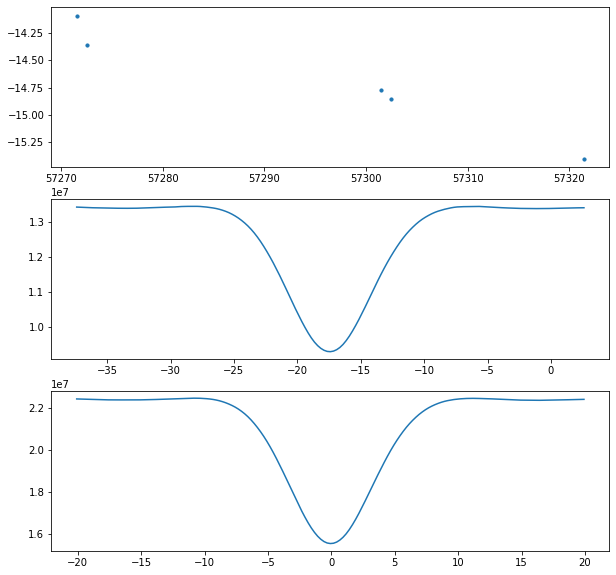

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].scatter(BJD_list[5:10], mu_zero_list[5:10], label = "shifted to zero", s=10)
ax[1].plot(rv_data, CCF_data)
ax[2].plot(rv_data_shifted, shifted_CCF_list[5])

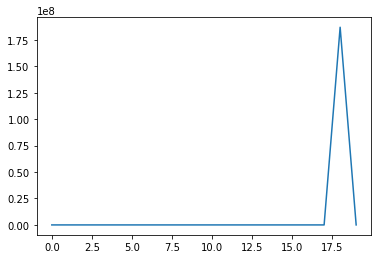

In [50]:
list1 = mu_zero_list[0:10]
list1b = mu_zero_list[12:67]
list2 = mu_zero_list[0:68]

for i in list1b:
    list1.append(i)
    
for i in list2:
    list1.append(i) 
    
plt.plot(mu_zero_list[50:70])

(array([132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  -27.56963679,   726.04155696,  1479.6527507 ,  2233.26394444,
         2986.87513819,  3740.48633193,  4494.09752567,  5247.70871941,
         6001.31991316,  6754.9311069 ,  7508.54230064,  8262.15349439,
         9015.76468813,  9769.37588187, 10522.98707562, 11276.59826936,
        12030.2094631 , 12783.82065685, 13537.43185059, 14291.04304433,
        15044.65423808, 15798.26543182, 16551.87662556, 17305.48781931,
        18059.09901305, 18812.71020679, 19566.32140053, 20319.93259428,
        21073.54378802, 21827.15498176, 22580.76617551]),
 <a list of 30 Patch objects>)

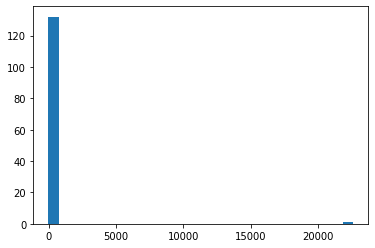

In [48]:
plt.hist(list1, bins=30)

In [217]:
# create a median ccf file as a reference
median_ccf = np.median(CCF_normalized_list, axis=0)

#creates columns in CCF.fits files
for s in [0]:
                col1 = fits.Column(name='RV data', format='E', array=rv_data_shifted)
                col2 = fits.Column(name='CCF data', format='E', array=median_ccf)
                #col3 = fits.Column(name='CCF data rescaled', format='E', array=CCF_rescaled)
                cols = fits.ColDefs([col1, col2]) #, col3])

                #tbhdu = fits.BinTableHDU.from_columns(cols)

                #hdu = fits.PrimaryHDU()
                hdu = fits.PrimaryHDU()
                hdulist = fits.HDUList([hdu])

                #hdu.data = fits.BinTableHDU.from_columns([col1, col2, col3])
                #hdu.data = fits.BinTableHDU.from_columns(cols)
                #hdu.data

                tbhdu = fits.BinTableHDU.from_columns(cols)
                hdu_new = fits.ImageHDU()
                hdr = fits.Header()
                primary_hdu = fits.PrimaryHDU(header=hdr)
                hdul = fits.HDUList([primary_hdu, hdu_new])

                hdul.append(tbhdu)

                hdul.writeto('hd212657/shifted_fits_clean73_Dec18/ccf_median.fits')
                hdul.close()



[-0.828538002337214,
 -0.9189534716324461,
 -1.1263196902536161,
 -1.7858860246401713,
 -27.30538931817712,
 -27.569636787151673,
 -0.9091751472988429,
 -1.0375823476719728,
 -1.2105200360090564,
 -0.020143975819881078,
 22580.766175507266,
 -1.130265261812125,
 -1.9086695970376386,
 -1.3981906217780227,
 -1.1393039082153071,
 -1.8547250353462852,
 -0.010364064807092588,
 -0.015848696664505158,
 -2.0436427810077307,
 -1.3371562452639658,
 0.13466527752739554,
 -0.04217280176922922,
 -0.9008426014956032,
 0.2869012696855562,
 -0.8740750278819092,
 -1.156709471697415,
 -0.9279685325045917,
 -2.201377706967093,
 -1.1653026323665963,
 -1.7322694108642458,
 -0.8302344205600071,
 -0.5117246208412735,
 -1.0557455285344828,
 -1.3745383978019734,
 -0.6954363463050882,
 -1.011199275998353,
 0.005447818252226896,
 0.009376953378892355,
 -0.017699718860130643,
 0.027456647409039123,
 -2.373198991900248,
 -1.0550294215251306,
 -26.687781642254272,
 -1.5168374265543387,
 -0.9539425032413883,
 558.70

In [12]:
# Compute residual CCFs
residual_CCF_list = []

for i in range(0, len(CCF_normalized_list)):
    residual_CCF = CCF_normalized_list[i] - np.median(CCF_normalized_list, axis=0)
    residual_CCF_list.append(residual_CCF)

# Compute median residual 
median_residual = np.median(residual_CCF_list, axis=0)
std_residual = np.std(residual_CCF_list, axis=0)

rescaled_residual_CCF_list = []
# Compute rescaled residuals
for i in range(0, len(residual_CCF_list)):
    rescaled_residual_CCF = (residual_CCF_list[i] - median_residual)/std_residual
    rescaled_residual_CCF_list.append(rescaled_residual_CCF)




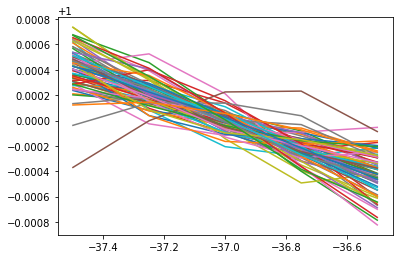

In [13]:
for i in np.arange(0, len(shifted_CCF_list)):
    plt.plot(rv_data_ref_shift_list[i][0:5], 
             ref_shifted_CCF_data_list[i][0:5]*(1/np.mean(ref_shifted_CCF_data_list[i][0:5])),
             label="other"+str(41+i))
#plt.legend()

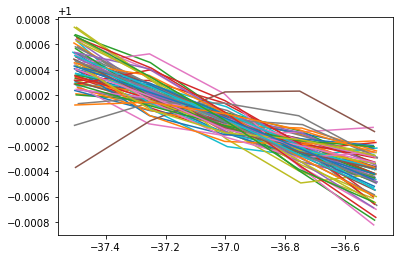

In [14]:
for i in np.arange(0, len(shifted_CCF_list)):
    plt.plot(rv_data_shifted_list[i][0:5], 
             shifted_CCF_list[i][0:5]*(1/np.mean(shifted_CCF_list[i][0:5])),
             label="other"+str(41+i))

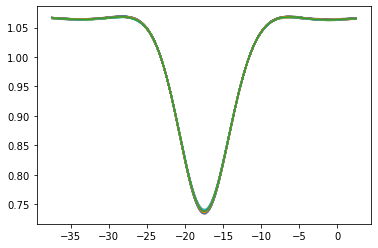

In [15]:
for i in np.arange(0, len(shifted_CCF_list)):
    plt.plot(rv_data_shifted_list[i], 
             shifted_CCF_list[i]*(1/np.mean(shifted_CCF_list[i])),
             label="other"+str(41+i))

In [16]:
radial_velocities = (s_pd_clean['vrad']-np.mean(s_pd_clean['vrad'])+0.008278815789473981)*1000
# color coding for residual plot
print(np.min(radial_velocities), np.max(radial_velocities))
min_rv = np.min(radial_velocities)
max_rv = np.max(radial_velocities)
cscale_residuals = ((np.array(np.abs(radial_velocities)) -min_rv)/ (max_rv-min_rv))
print(np.min(cscale_residuals), np.max(cscale_residuals))

-0.11529379956698449 18.094706200432853
0.012662690781656839 1.0


In [17]:
(s['vrad']-np.mean(s['vrad']))*1000

array([-2.14881579, -0.37881579, -1.35881579, -3.62881579, -4.41881579,
       -4.25881579, -4.01881579, -7.66881579, -4.09881579, -6.80881579,
        3.68118421,  6.50118421,  2.31118421,  4.37118421,  0.26118421,
        0.98118421, -4.31881579,  5.67118421, -6.45881579,  5.20118421,
        3.19118421, -3.33881579, -3.34881579, -5.53881579, -2.28881579,
        0.15118421, -4.04881579, -3.51881579, -2.79881579, -6.37881579,
       -4.76881579, -3.55881579,  3.65118421,  2.50118421,  0.78118421,
       -3.26881579, -0.89881579,  0.23118421,  3.72118421, -8.27881579,
       -2.13881579, -0.75881579,  9.93118421,  4.86118421,  0.87118421,
        1.95118421,  3.20118421,  1.83118421, -0.05881579, -0.94881579,
        1.83118421,  0.32118421,  1.03118421,  0.45118421,  2.27118421,
        1.23118421,  1.06118421,  4.36118421,  1.17118421,  0.54118421,
        4.50118421, -1.60881579, -1.14881579,  1.60118421,  4.96118421,
        2.43118421, -3.22881579, -7.44881579,  6.87118421,  1.01

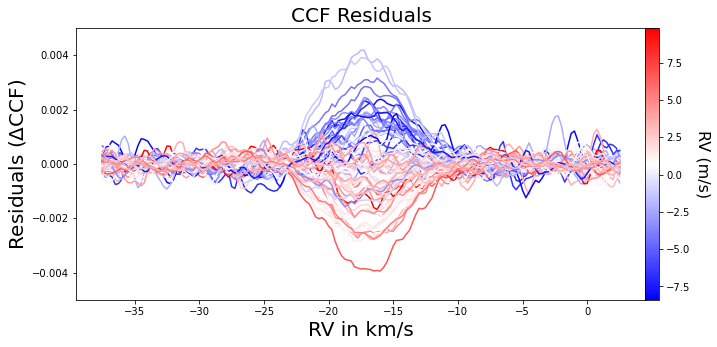

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))

col = plt.cm.jet([0.25,0.75])
n = len(radial_velocities)
colors = plt.cm.bwr(cscale_residuals)
rv_data = np.linspace(-20, 20, 161)

col = plt.cm.jet([0.25,0.75])
n = len(shifted_CCF_list)
colors = plt.cm.bwr(cscale_residuals)

for i in np.arange(0, len(residual_CCF_list)):
    if i != 16 and i!=41 and i!=21:
        plt.plot(rv_data_shifted_list[i], residual_CCF_list[i], color = colors[i])
        plt.ylim(-0.005, 0.005)


plt.xlabel('RV in km/s', size=20)
plt.ylabel('Residuals ($\Delta$CCF)', size=20)
plt.title("CCF Residuals", size =20)

rv_list = (s_pd_clean['vrad']-np.mean(s_pd_clean['vrad']))*1000
cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=np.min(rv_list), vmax=np.max(rv_list))

#cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
#             , orientation='vertical', label='Radial Velocities (m/s)')

cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", pad=-0.0001)
cb.set_label(label='RV (m/s)', size=16, rotation=270, labelpad=20)

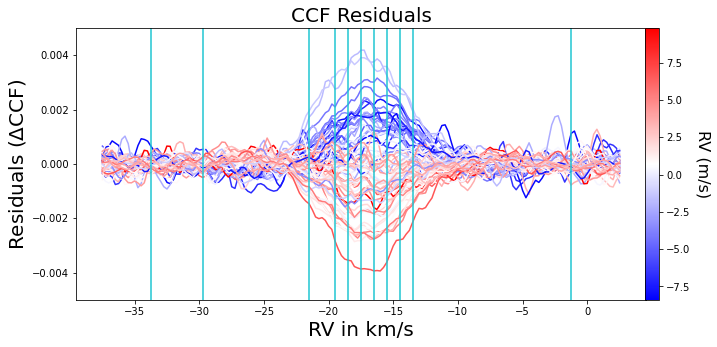

In [27]:
# plot vertical lines
ccf_indexes = [15, 31, 64 , 72 ,76 , 80 , 84,  88 ,92,  96, 145]

fig, ax = plt.subplots(figsize=(12, 5))

col = plt.cm.jet([0.25,0.75])
n = len(radial_velocities)
colors = plt.cm.bwr(cscale_residuals)
rv_data = np.linspace(-20, 20, 161)

col = plt.cm.jet([0.25,0.75])
n = len(shifted_CCF_list)
colors = plt.cm.bwr(cscale_residuals)

for i in np.arange(0, len(residual_CCF_list)):
    if i != 16 and i!=41 and i!=21:
        plt.plot(rv_data_shifted_list[i], residual_CCF_list[i], color = colors[i], zorder=0)
        plt.ylim(-0.005, 0.005)

for i in ccf_indexes:
    plt.vlines(rv_data_shifted_list[0][i], -0.005, 0.005, colors='#1dc5d1', linestyles='solid', zorder=1)
plt.xlabel('RV in km/s', size=20)
plt.ylabel('Residuals ($\Delta$CCF)', size=20)
plt.title("CCF Residuals", size =20)

rv_list = (s_pd_clean['vrad']-np.mean(s_pd_clean['vrad']))*1000
cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=np.min(rv_list), vmax=np.max(rv_list))

#cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
#             , orientation='vertical', label='Radial Velocities (m/s)')

cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", pad=-0.0001)
cb.set_label(label='RV (m/s)', size=16, rotation=270, labelpad=20)

In [276]:
list_a  =[0, 1, 2, 3, 4, 5]
list_a.remove(1)
list_a

[0, 2, 3, 4, 5]

(-0.005, 0.005)

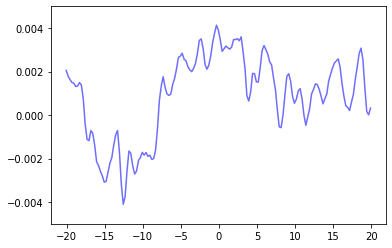

In [195]:
i=16
plt.plot(rv_data_shifted_list[i], 
             residual_CCF_list[i],
             color = colors[i])
plt.ylim(-0.005, 0.005)

In [210]:
residual_CCF_list

[array([ 1.47020436e-05, -5.39931718e-05, -7.25232343e-05, -4.45603191e-05,
        -2.60274119e-06,  4.01479567e-05,  1.29223945e-04,  1.69707958e-04,
         1.74937581e-04,  2.02162093e-04,  2.34096932e-04,  2.14688131e-04,
         1.95741735e-04,  2.40827100e-04,  2.40027827e-04,  2.59248369e-04,
         2.58046064e-04,  2.08174463e-04,  9.75034333e-05,  4.22578449e-06,
        -6.03717734e-05, -1.21161435e-04, -2.15773519e-04, -1.88784554e-04,
        -9.71738362e-05,  7.91663579e-05,  1.90026181e-04,  2.08927783e-04,
         5.46771763e-05,  2.57784194e-05,  8.46670493e-05,  1.28537235e-04,
         1.59481657e-04,  7.53470355e-05, -5.63586537e-05, -1.39851455e-04,
        -2.24380080e-04, -2.31005181e-04, -2.86779657e-04, -2.60276474e-04,
        -9.53399886e-05,  4.41889226e-05,  4.20495983e-05, -7.91585500e-06,
         5.21689527e-05,  8.69973280e-05,  6.40079019e-05, -6.84216134e-05,
        -1.07542080e-04, -1.22031553e-04,  9.92915876e-06,  6.50027719e-05,
         4.6

IndexError: index 76 is out of bounds for axis 0 with size 76

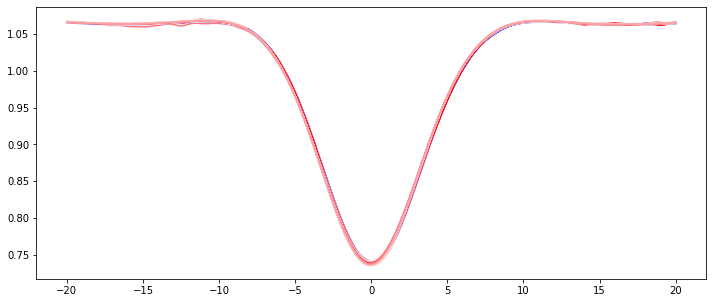

In [23]:
col = plt.cm.jet([0.25,0.75])
n = len(radial_velocities)
colors = plt.cm.bwr(cscale_residuals)
rv_data = np.linspace(-20, 20, 161)

col = plt.cm.jet([0.25,0.75])
n = len(shifted_CCF_list)
colors = plt.cm.bwr(cscale_residuals)


#for i in range(0,len(ccf_list)):
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0,len(shifted_CCF_list)):
      plt.plot(rv_data, shifted_CCF_list[i]*(1/np.mean(shifted_CCF_list[i])), color = colors[i])
      plt.grid(False)

plt.xlabel('RV in km/s', size=20)
plt.ylabel('Residuals ($\Delta$CCF)', size=20)
plt.title("CCF Residuals", size =20)

rv_list = (s['vrad']-np.mean(s['vrad']))*1000
cmap = mpl.cm.bwr
norm = mpl.colors.Normalize(vmin=np.min(rv_list), vmax=np.max(rv_list))

#cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
#             , orientation='vertical', label='Radial Velocities (m/s)')

cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", pad=-0.0001)
cb.set_label(label='RV (m/s)', size=16, rotation=270, labelpad=20)